In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime

In [2]:
#data=pd.read_csv("godavari_daily.csv")
data=pd.read_excel("data/Godavari.xlsx")
y=data['Flood']
# data.drop('Flood',axis=1,inplace=True)

# dataset has benn updated to make a binary classification problem. 

In [3]:
set(y)

{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.6,
 1.7,
 1.8,
 1.9,
 2.1,
 2.2,
 2.4,
 2.6,
 3.0,
 3.1,
 3.8,
 4.0,
 4.2,
 4.8,
 5.4,
 5.5,
 6.0,
 6.1,
 6.5,
 6.9,
 7.0,
 7.1,
 7.3,
 7.4,
 7.9,
 8.4,
 9.4,
 9.8,
 10.0}

<Axes: >

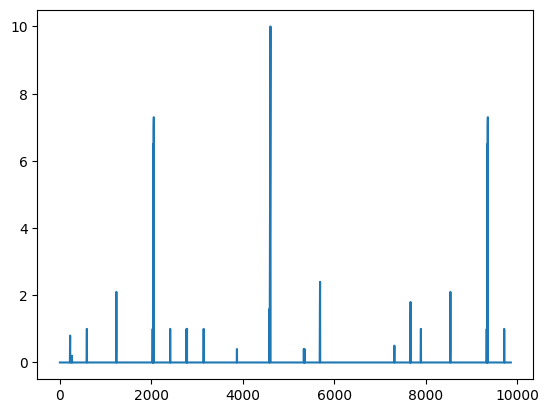

In [4]:
y.plot(x = data['Date'], y = y)

In [5]:
print(data.shape)
data.head()

(9862, 6)


,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1998-01-01,3244.0,0.0,0.91,NaN,0.0
1,1998-01-02,1591.0,0.0,0.45,NaN,0.0
2,1998-01-03,1973.0,0.0,0.55,NaN,0.0
3,1998-01-04,1973.0,0.0,0.55,NaN,0.0
4,1998-01-05,2011.0,0.0,0.56,NaN,0.0


In [6]:
for i in range(len(y)):
    if y.iloc[i] >= 0.5 :
        y.iloc[i]=1.0
    else :
        y.iloc[i]=0.0
data.drop('Flood',axis=1,inplace=True)

C:\Users\lavri\AppData\Local\Temp\ipykernel_4524\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\lavri\AppData\Local\Temp\ipykernel_4524\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\lavri\AppData\Local\Temp\ipykernel_4524\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\lavri\AppData\Local\Temp\ipykernel_4524\1243519634.p

In [7]:
y.value_counts()

Flood
0.0    9767
1.0      95
Name: count, dtype: int64

In [8]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN


In [9]:
d1=pd.DataFrame()
d1["Day"]=data['Date']
d1['Months']=data['Date']
d1['Year']=data['Date']


In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
d1["Year"]=data.Date.dt.year
d1["Months"]=data.Date.dt.month
d1["Day"]=data.Date.dt.day
d1.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [12]:
type(d1['Day'][0])

numpy.int32

In [13]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN


In [14]:
data = data.fillna(data.mean())
data.info()
data.drop(columns='Date',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9862 non-null   datetime64[ns]
 1   Discharge      9862 non-null   float64       
 2   flood runoff   9862 non-null   float64       
 3   daily runoff   9862 non-null   float64       
 4   weekly runoff  9862 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 385.4 KB


In [15]:
data.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,3244.0,0.0,0.91,7.372539
1,1591.0,0.0,0.45,7.372539
2,1973.0,0.0,0.55,7.372539
3,1973.0,0.0,0.55,7.372539
4,2011.0,0.0,0.56,7.372539


In [16]:
data=pd.concat([d1,data],axis=1)
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,3244.0,0.0,0.91,7.372539
1,2,1,1998,1591.0,0.0,0.45,7.372539
2,3,1,1998,1973.0,0.0,0.55,7.372539
3,4,1,1998,1973.0,0.0,0.55,7.372539
4,5,1,1998,2011.0,0.0,0.56,7.372539


In [17]:
scl=MinMaxScaler()
data1=scl.fit_transform(data.iloc[:,3:])
data1=scl.fit_transform(data1)

In [18]:
column=['Discharge','flood runoff','daily runoff','weekly runoff']

In [19]:
data1=pd.DataFrame(data1,columns=column)
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.153595
1,0.052762,0.0,0.053318,0.153595
2,0.065431,0.0,0.065166,0.153595
3,0.065431,0.0,0.065166,0.153595
4,0.066691,0.0,0.066351,0.153595


In [20]:
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.153595
1,0.052762,0.0,0.053318,0.153595
2,0.065431,0.0,0.065166,0.153595
3,0.065431,0.0,0.065166,0.153595
4,0.066691,0.0,0.066351,0.153595


In [21]:
data1.describe()

,Discharge,flood runoff,daily runoff,weekly runoff
count,9862.000000,9862.000000,9862.000000,9862.000000
mean,0.125305,0.003146,0.124941,0.153595
std,0.111589,0.040813,0.111723,0.129381
min,0.000000,0.000000,0.000000,0.000000
25%,0.051967,0.000000,0.052133,0.067760
50%,0.094183,0.000000,0.093602,0.116458
75%,0.161314,0.000000,0.161137,0.196615
max,1.000000,1.000000,1.000000,1.000000


In [22]:
data.describe()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
count,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000
mean,15.729974,6.522815,2011.000710,3778.446783,0.110101,1.054502,7.372539
std,8.800680,3.448910,7.789473,3364.841147,1.428468,0.942941,6.210303
min,1.000000,1.000000,1998.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2004.000000,1567.000000,0.000000,0.440000,3.252500
50%,16.000000,7.000000,2011.000000,2840.000000,0.000000,0.790000,5.590000
75%,23.000000,10.000000,2018.000000,4864.250000,0.000000,1.360000,9.437500
max,31.000000,12.000000,2024.000000,30154.000000,35.000000,8.440000,48.000000


In [23]:
x=pd.DataFrame(data=data['Day'])
x['Months']=data['Months']
x['Year']=data['Year']
x.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [24]:
data1=pd.concat([x,data1],axis=1)

In [25]:
data=data1
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,0.107581,0.0,0.107820,0.153595
1,2,1,1998,0.052762,0.0,0.053318,0.153595
2,3,1,1998,0.065431,0.0,0.065166,0.153595
3,4,1,1998,0.065431,0.0,0.065166,0.153595
4,5,1,1998,0.066691,0.0,0.066351,0.153595


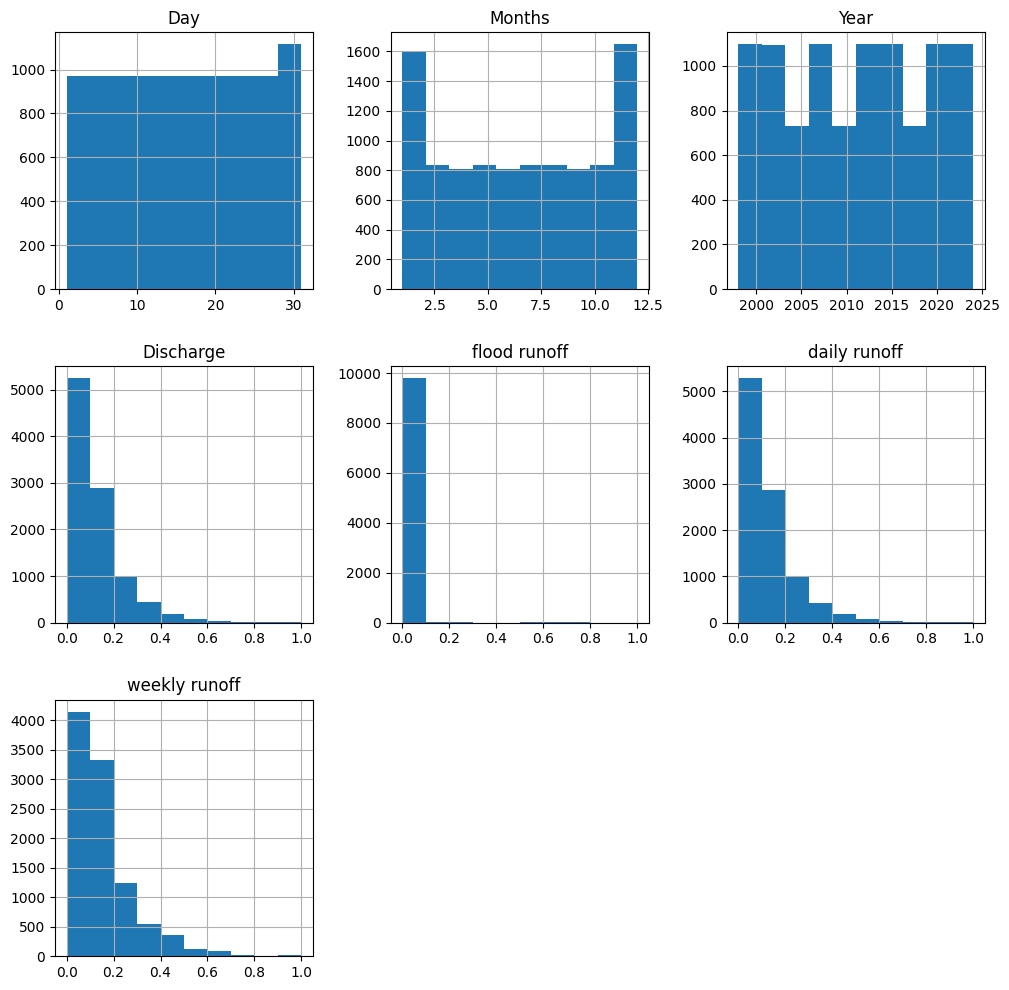

In [26]:
data.hist(figsize=(12,12));

In [27]:
print(data.columns)

Index(['Day', 'Months', 'Year', 'Discharge', 'flood runoff', 'daily runoff',
       'weekly runoff'],
      dtype='object')


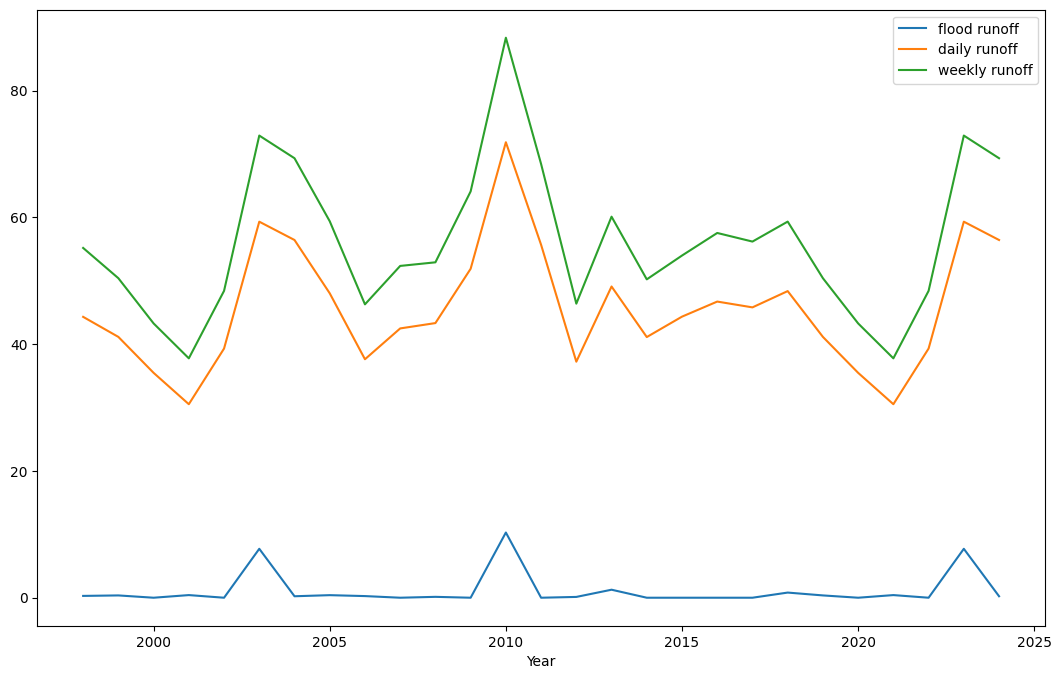

In [28]:
data[['Year', 'flood runoff', 'daily runoff', 'weekly runoff']].groupby("Year").sum().plot(figsize=(13,8));

In [29]:
locate=0;
for i in range(len(data["Day"])):
    if(data["Day"][i]==31 and data["Months"][i]==12 and data["Year"][i]==2012):
        locate=i;
        break;

i=locate+1
print(i)

x_train=data.iloc[0:i,:]
y_train=y.iloc[0:i]
x_test=data.iloc[i:,:]
y_test=y.iloc[i:]


5479


In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5479, 7)
(5479,)
(4383, 7)
(4383,)


In [31]:
y_test.value_counts()

Flood
0.0    4344
1.0      39
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
yp=reg.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))


0.6256026930757439
0.5863700016016311


In [34]:
# from sklearn import linear_model
# from sklearn.metrics import mean_absolute_error
# # linear model
# reg = linear_model.ElasticNet(alpha=0.5)
# reg.fit(X_train_res_shuf, Y_train_res_shuf)
# y_pred = reg.predict(x_test)
# print(mean_absolute_error(y_test, y_pred))

In [35]:
yt=np.array(y_test)
len((y_test))

4383

In [36]:
# Y_pre["ypre"].value_counts()

In [37]:
# Y_pre=pd.DataFrame()
# Y_pre["ypre"]=y_pred
# Y_pre["ytest"]=yt
# #Y_pre

In [38]:
# Y_pre[['ypre','ytest']].plot(figsize=(19,8));

In [39]:
# Linear regression will not work for binary classification  pr

# SMOTE Oversampling
#!pip install imblearn

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (6903, 7)
Number transactions Y_train dataset:  (6903,)
Number transactions X_test dataset:  (2959, 7)
Number transactions Y_test dataset:  (2959,)


In [41]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 63
Before OverSampling, counts of label '0': 6840 

After OverSampling, the shape of train_X: (13680, 7)
After OverSampling, the shape of train_y: (13680,) 

After OverSampling, counts of label '1': 6840
After OverSampling, counts of label '0': 6840


C:\Users\lavri\AppData\Local\Temp\ipykernel_4524\1246090473.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())


<Axes: >

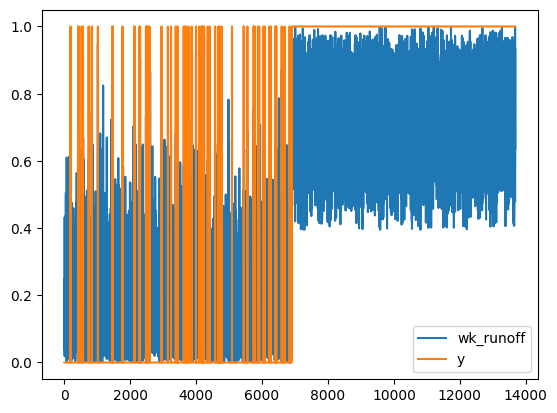

In [42]:
import pandas as pd

# Convert X_train_res to a DataFrame if it's not already one
if isinstance(X_train_res, pd.DataFrame):
    data_new = pd.DataFrame({'wk_runoff': X_train_res.iloc[:, -1], 'y': Y_train_res})
else:
    data_new = pd.DataFrame({'wk_runoff': X_train_res[:, -1], 'y': Y_train_res})
    
data_new.plot()


In [43]:
from sklearn.utils import shuffle
X_train_res_shuf, Y_train_res_shuf = shuffle( X_train_res, Y_train_res, random_state=0)

In [44]:
Y_test.value_counts()

Flood
0.0    2927
1.0      32
Name: count, dtype: int64

In [45]:
# Try binary classifiers
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [47]:
import pandas as pd
from sklearn import model_selection

# Define models and append them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)  # Set shuffle=True
    cv_results = model_selection.cross_val_score(model, X_train_res_shuf, Y_train_res_shuf, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\lavri\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lavri\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LR: 0.995541 (0.001974)
LDA: 0.986111 (0.003253)
KNN: 0.985819 (0.002246)
CART: 1.000000 (0.000000)
NB: 0.991447 (0.002794)
SVM: 0.490058 (0.004151)


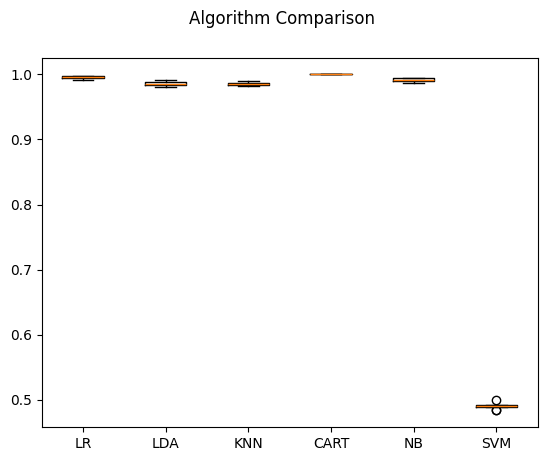

In [48]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('static/img/modelComparison/flood_models.png')
plt.show()

# Make predictions on validation dataset

In [49]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.9729638391348429
[[2855   72]
 [   8   24]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2927
         1.0       0.25      0.75      0.38        32

    accuracy                           0.97      2959
   macro avg       0.62      0.86      0.68      2959
weighted avg       0.99      0.97      0.98      2959



In [50]:
#-----------------------LinearDiscriminantAnalysis---------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis()
clf1.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = clf1.predict(X_test)
# y_predict3=clf1.predict(x_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.9753295032105441
[[2854   73]
 [   0   32]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2927
         1.0       0.30      1.00      0.47        32

    accuracy                           0.98      2959
   macro avg       0.65      0.99      0.73      2959
weighted avg       0.99      0.98      0.98      2959



In [51]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%


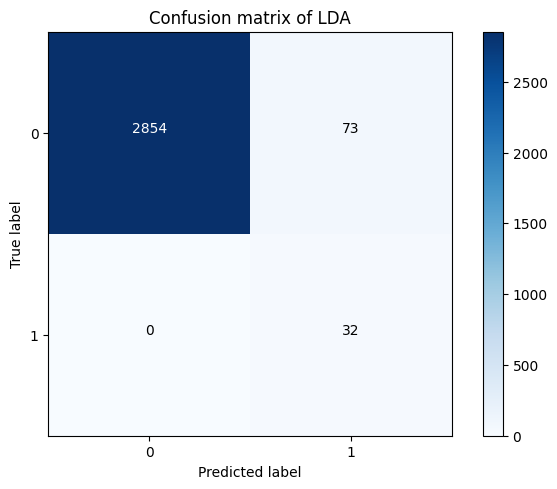

In [52]:
#cnf_matrix_tra = confusion_matrix(Y_test, predictions)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix of LDA')
plt.savefig('static/img/modelComparison/flood_confusionmatrix.png')
plt.show()